In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina' 

In [3]:
df_netflix = pd.read_csv('../data/netflix_titles.csv')

In [4]:
def df_normalize_strings(df, col):
    df[col] = df[col].str.lower() # change everything to lower cases
    df[col] = df[col].fillna(np.nan) #fill any empty space with np.nan
    df[col] = df[col].replace('none or unspecified', np.nan) # make none or unspecified -> np.nan
    df[col] = df[col].replace('none', np.nan) # make none -> np.nan
    df[col] = df[col].replace('no', np.nan) # make no -> np.nan
    df[col] = df[col].replace('#name?', np.nan) # make #name? -> np.nan
    df[col] = df[col].replace('', np.nan) # empty -> np.nan

In [5]:
df_normalize_strings(df_netflix, 'director')
df_normalize_strings(df_netflix, 'cast')
df_normalize_strings(df_netflix, 'country')
df_normalize_strings(df_netflix, 'date_added')
df_normalize_strings(df_netflix, 'rating')
df_normalize_strings(df_netflix, 'duration')

In [6]:
netflix_df_exploded = df_netflix.assign(genre=df_netflix["listed_in"].str.split(', ')).explode("genre")
netflix_df_exploded["genre"] = netflix_df_exploded["genre"].str.strip()
netflix_df_exploded["genre"].value_counts()

genre
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                 

In [7]:
df_netflix_movie = netflix_df_exploded.loc[netflix_df_exploded['type']=='Movie']

df_netflix_movie['movie_length'] = df_netflix_movie['duration'].str.extract('([0-9]*)', expand=True)
df_netflix_movie['movie_length'] = df_netflix_movie['movie_length'].replace('', np.nan)
df_netflix_movie['movie_length'] = pd.to_numeric(df_netflix_movie['movie_length'])

/var/folders/v6/9hfzlnwj3672rdvg1lsvm1yc0000gn/T/ipykernel_23342/1868786326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_movie['movie_length'] = df_netflix_movie['duration'].str.extract('([0-9]*)', expand=True)
/var/folders/v6/9hfzlnwj3672rdvg1lsvm1yc0000gn/T/ipykernel_23342/1868786326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_movie['movie_length'] = df_netflix_movie['movie_length'].replace('', np.nan)
/var/folders/v6/9hfzlnwj3672rdvg1lsvm1yc0000gn/T/ipykernel_23342/18

In [8]:
df_hulu = pd.read_csv('../data/hulu_titles.csv')

In [9]:
hulu_df_exploded = df_hulu.assign(genre=df_hulu["listed_in"].str.split(', ')).explode("genre")
hulu_df_exploded["genre"] = hulu_df_exploded["genre"].str.strip()
hulu_df_exploded["genre"].value_counts()

genre
Drama                   907
Comedy                  667
Adventure               556
Action                  555
Documentaries           524
Anime                   329
Horror                  304
Reality                 247
Thriller                231
Crime                   217
International           216
Family                  205
Romance                 186
Kids                    162
Lifestyle & Culture     155
Sports                  139
Science Fiction         122
Sitcom                  118
Black Stories           113
News                    106
Latino                   92
Mystery                  81
Cooking & Food           80
Music                    79
History                  70
LGBTQ+                   67
Science & Technology     48
Adult Animation          37
Classics                 35
Teen                     34
Cartoons                 34
Game Shows               18
Stand Up                 12
Health & Wellness         8
Late Night                4
Sketch Comedy 

In [10]:
df_hulu_movie = hulu_df_exploded.loc[hulu_df_exploded['type']=='Movie']

In [11]:
df_hulu_movie['movie_length'] = df_hulu_movie['duration'].str.extract('([0-9]*)', expand=True)
df_hulu_movie['movie_length'] = df_hulu_movie['movie_length'].replace('', np.nan)
df_hulu_movie['movie_length'] = pd.to_numeric(df_hulu_movie['movie_length'])

/var/folders/v6/9hfzlnwj3672rdvg1lsvm1yc0000gn/T/ipykernel_23342/525308501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hulu_movie['movie_length'] = df_hulu_movie['duration'].str.extract('([0-9]*)', expand=True)
/var/folders/v6/9hfzlnwj3672rdvg1lsvm1yc0000gn/T/ipykernel_23342/525308501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hulu_movie['movie_length'] = df_hulu_movie['movie_length'].replace('', np.nan)
/var/folders/v6/9hfzlnwj3672rdvg1lsvm1yc0000gn/T/ipykernel_23342/525308501.py:3: 

In [12]:
print(df_hulu_movie)

     show_id   type                                      title director  cast  \
0         s1  Movie             Ricky Velez: Here's Everything      NaN   NaN   
0         s1  Movie             Ricky Velez: Here's Everything      NaN   NaN   
1         s2  Movie                               Silent Night      NaN   NaN   
1         s2  Movie                               Silent Night      NaN   NaN   
1         s2  Movie                               Silent Night      NaN   NaN   
...      ...    ...                                        ...      ...   ...   
2982   s2983  Movie  (Sub) Legend of Heroes: Trails in the Sky      NaN   NaN   
2982   s2983  Movie  (Sub) Legend of Heroes: Trails in the Sky      NaN   NaN   
2982   s2983  Movie  (Sub) Legend of Heroes: Trails in the Sky      NaN   NaN   
2993   s2994  Movie             Amy Winehouse: A Final Goodbye      NaN   NaN   
2993   s2994  Movie             Amy Winehouse: A Final Goodbye      NaN   NaN   

             country       

In [13]:

df_netflix_movie['Platform'] = 'Netflix'
df_hulu_movie['Platform'] = 'Hulu'

df_movies = pd.concat([df_netflix_movie, df_hulu_movie], axis=0)

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16288 entries, 0 to 2993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16288 non-null  object 
 1   type          16288 non-null  object 
 2   title         16288 non-null  object 
 3   director      12890 non-null  object 
 4   cast          12383 non-null  object 
 5   country       13734 non-null  object 
 6   date_added    16288 non-null  object 
 7   release_year  16288 non-null  int64  
 8   rating        15798 non-null  object 
 9   duration      15399 non-null  object 
 10  listed_in     16288 non-null  object 
 11  description   16285 non-null  object 
 12  genre         16288 non-null  object 
 13  movie_length  15399 non-null  float64
 14  Platform      16288 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


/var/folders/v6/9hfzlnwj3672rdvg1lsvm1yc0000gn/T/ipykernel_23342/1255486634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_movie['Platform'] = 'Netflix'
/var/folders/v6/9hfzlnwj3672rdvg1lsvm1yc0000gn/T/ipykernel_23342/1255486634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hulu_movie['Platform'] = 'Hulu'


In [14]:
print(df_movies)

     show_id   type                                      title  \
0         s1  Movie                       Dick Johnson Is Dead   
6         s7  Movie           My Little Pony: A New Generation   
7         s8  Movie                                    Sankofa   
7         s8  Movie                                    Sankofa   
7         s8  Movie                                    Sankofa   
...      ...    ...                                        ...   
2982   s2983  Movie  (Sub) Legend of Heroes: Trails in the Sky   
2982   s2983  Movie  (Sub) Legend of Heroes: Trails in the Sky   
2982   s2983  Movie  (Sub) Legend of Heroes: Trails in the Sky   
2993   s2994  Movie             Amy Winehouse: A Final Goodbye   
2993   s2994  Movie             Amy Winehouse: A Final Goodbye   

                           director  \
0                   kirsten johnson   
6     robert cullen, josé luis ucha   
7                      haile gerima   
7                      haile gerima   
7           

In [15]:
def decade(year):
    if year >= 2020:
        return '2020s'
    elif year >= 2010:
        return '2010s'
    elif year >= 2000:
        return '2000s'
    elif year >= 1990:
        return '1990s'
    elif year >= 1980:
        return '1980s'
    elif year >= 1970:
        return '1970s'
    elif year >= 1960:
        return '1960s'
    elif year >= 1950:
        return '1950s'
    elif year >= 1940:
        return '1940s'
    elif year >= 1930:
        return '1930s' 
    else:
        return '1920s' 

In [16]:
df_movies['Era'] = df_movies['release_year'].apply(decade)

In [17]:
df_movies['date_added'] = pd.to_datetime(df_movies['date_added'])
df_movies['year_added'] = df_movies['date_added'].dt.year

/var/folders/v6/9hfzlnwj3672rdvg1lsvm1yc0000gn/T/ipykernel_23342/2312352666.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_movies['date_added'] = pd.to_datetime(df_movies['date_added'])


In [18]:
pivot_movie = pd.pivot_table(df_movies[df_movies['release_year']>=1950], values='movie_length', index='Era', columns='Platform', aggfunc='median')
print(pivot_movie)

Platform   Hulu  Netflix
Era                     
1950s      90.0    106.0
1960s     110.0    152.0
1970s      95.0    117.0
1980s     103.0    113.0
1990s     109.0    111.5
2000s     103.0    110.0
2010s      97.0    100.0
2020s      97.0    100.0


In [43]:
pivot_movie = pd.pivot_table(df_movies[df_movies['release_year']>=1950], values='movie_length', index='Era', aggfunc='median')
print(pivot_movie)

       movie_length
Era                
1950s         101.0
1960s         127.0
1970s         112.0
1980s         108.0
1990s         110.0
2000s         109.0
2010s          99.0
2020s          99.0


In [44]:
pivot_movie = pd.pivot_table(df_movies[df_movies['release_year']>=1950], values='movie_length', index='Era', aggfunc='count')
print(pivot_movie)

       movie_length
Era                
1950s            42
1960s            99
1970s           221
1980s           372
1990s           674
2000s          1830
2010s         10124
2020s          2012


In [47]:
pivot_movie = pd.pivot_table(df_movies[df_movies['year_added']>=2010], values='movie_length', index='year_added', aggfunc='median')
print(pivot_movie)

            movie_length
year_added              
2010                84.0
2011                94.0
2012                51.0
2013                84.0
2014                81.0
2015                85.0
2016                92.0
2017                97.0
2018               103.0
2019               101.0
2020               102.0
2021               102.0


In [48]:
pivot_movie = pd.pivot_table(df_movies[df_movies['year_added']>=2010], columns = 'Platform', values='movie_length', index='year_added', aggfunc='median')
print(pivot_movie)

Platform     Hulu  Netflix
year_added                
2010          NaN     84.0
2011          NaN     94.0
2012          NaN     51.0
2013         84.0    100.0
2014         81.0     79.0
2015         87.0     84.5
2016        101.0     91.5
2017         93.0     97.0
2018         93.0    104.0
2019         95.0    102.0
2020         98.0    103.0
2021        102.0    102.0


<Axes: xlabel='Era'>

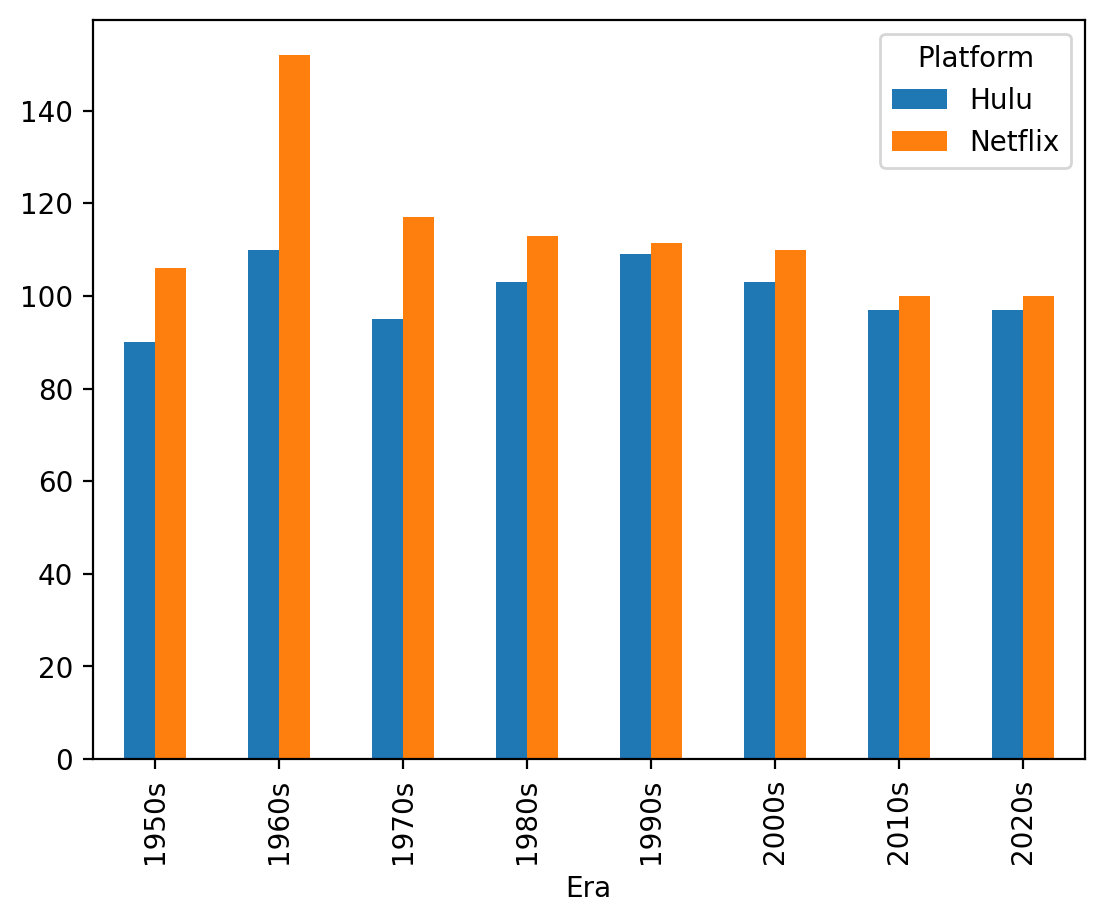

In [19]:
pivot_movie.plot(kind = 'bar')

In [20]:
df_hulu = df_movies[df_movies['Platform']=='Hulu']
df_netflix = df_movies[df_movies['Platform']=='Netflix']

df_hulu = df_hulu[df_hulu['release_year']>= 1970]
df_netflix = df_netflix[df_netflix['release_year']>= 1970]

In [21]:
df_hulu_median = df_hulu.groupby('Era')['movie_length'].median()
df_netflix_median = df_netflix.groupby('Era')['movie_length'].median()



<Axes: xlabel='Era'>

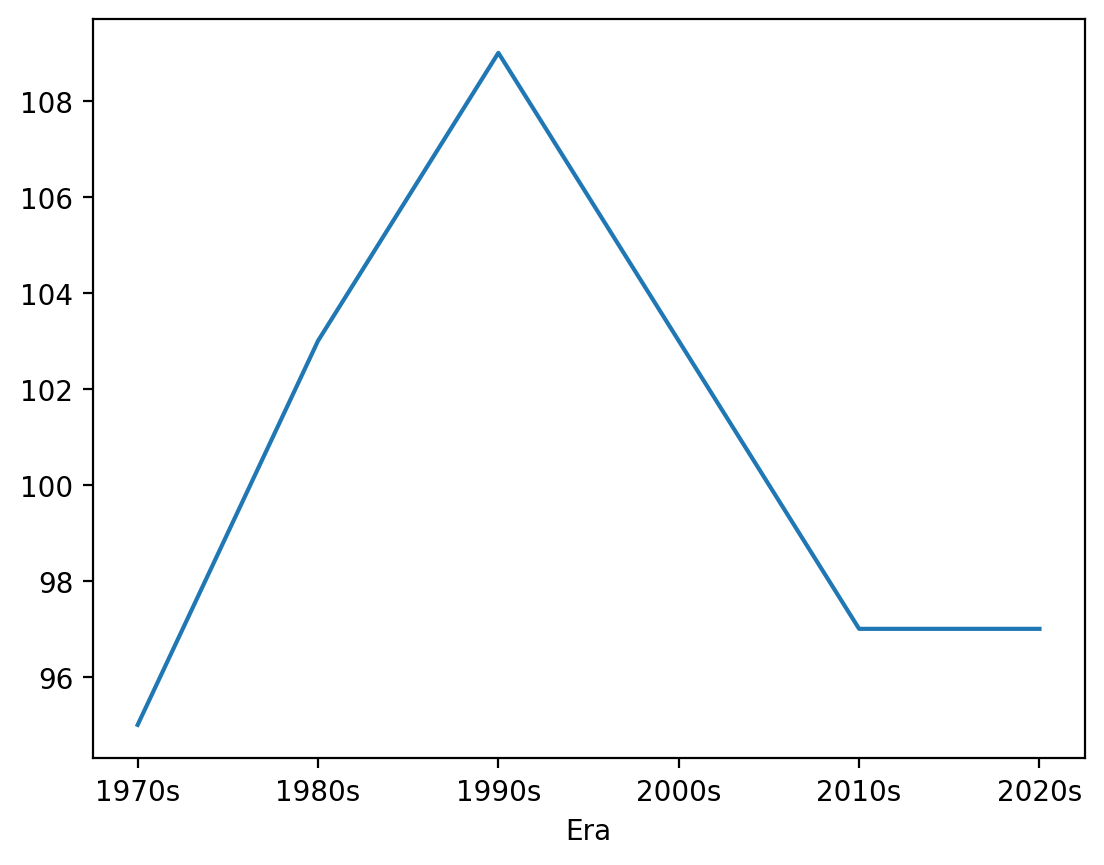

In [22]:
df_hulu_median.plot()

<Axes: xlabel='Era'>

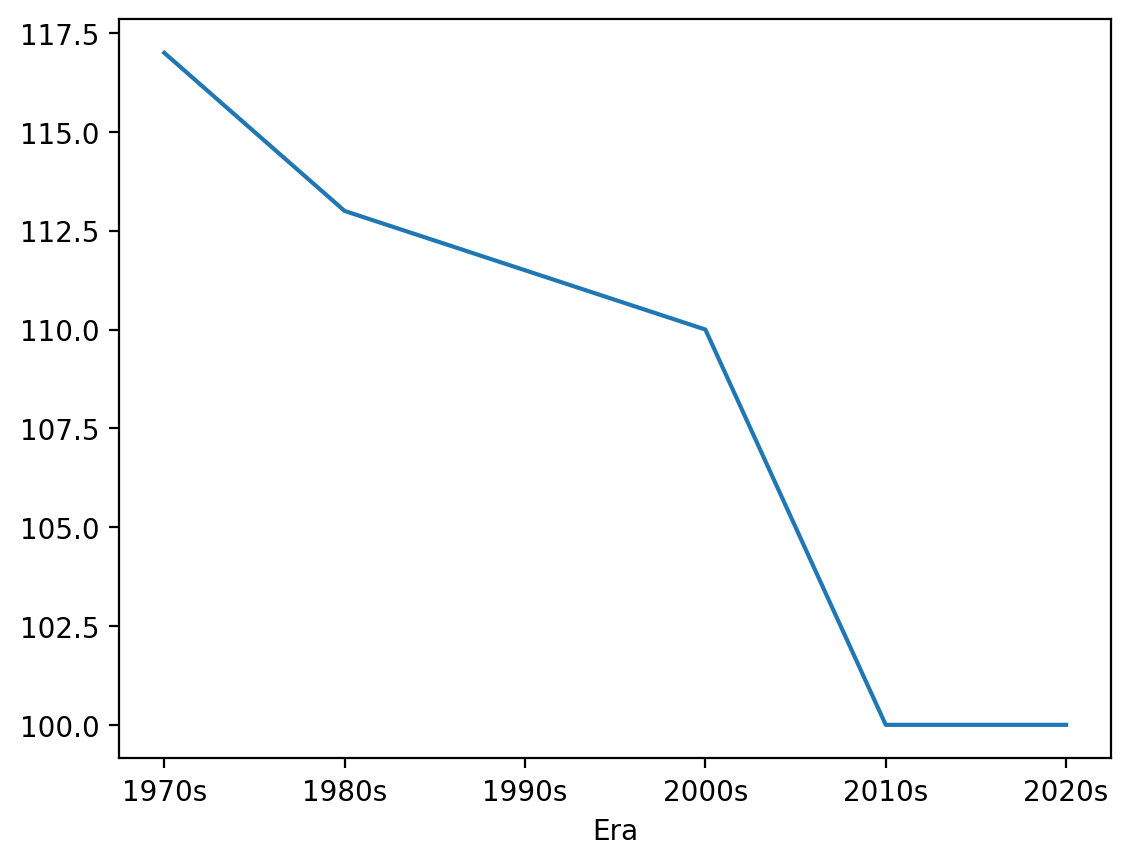

In [23]:
df_netflix_median.plot()

/var/folders/v6/9hfzlnwj3672rdvg1lsvm1yc0000gn/T/ipykernel_23342/555548339.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate("Netflix", (5.2 , df_netflix_median[-1]  ),size=15,annotation_clip=False, color='#C8341D', weight='bold')
/var/folders/v6/9hfzlnwj3672rdvg1lsvm1yc0000gn/T/ipykernel_23342/555548339.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate("Hulu", (5.2, df_hulu_median[-1] ),size=15,annotation_clip=False, color='#17BEBB', weight='bold')


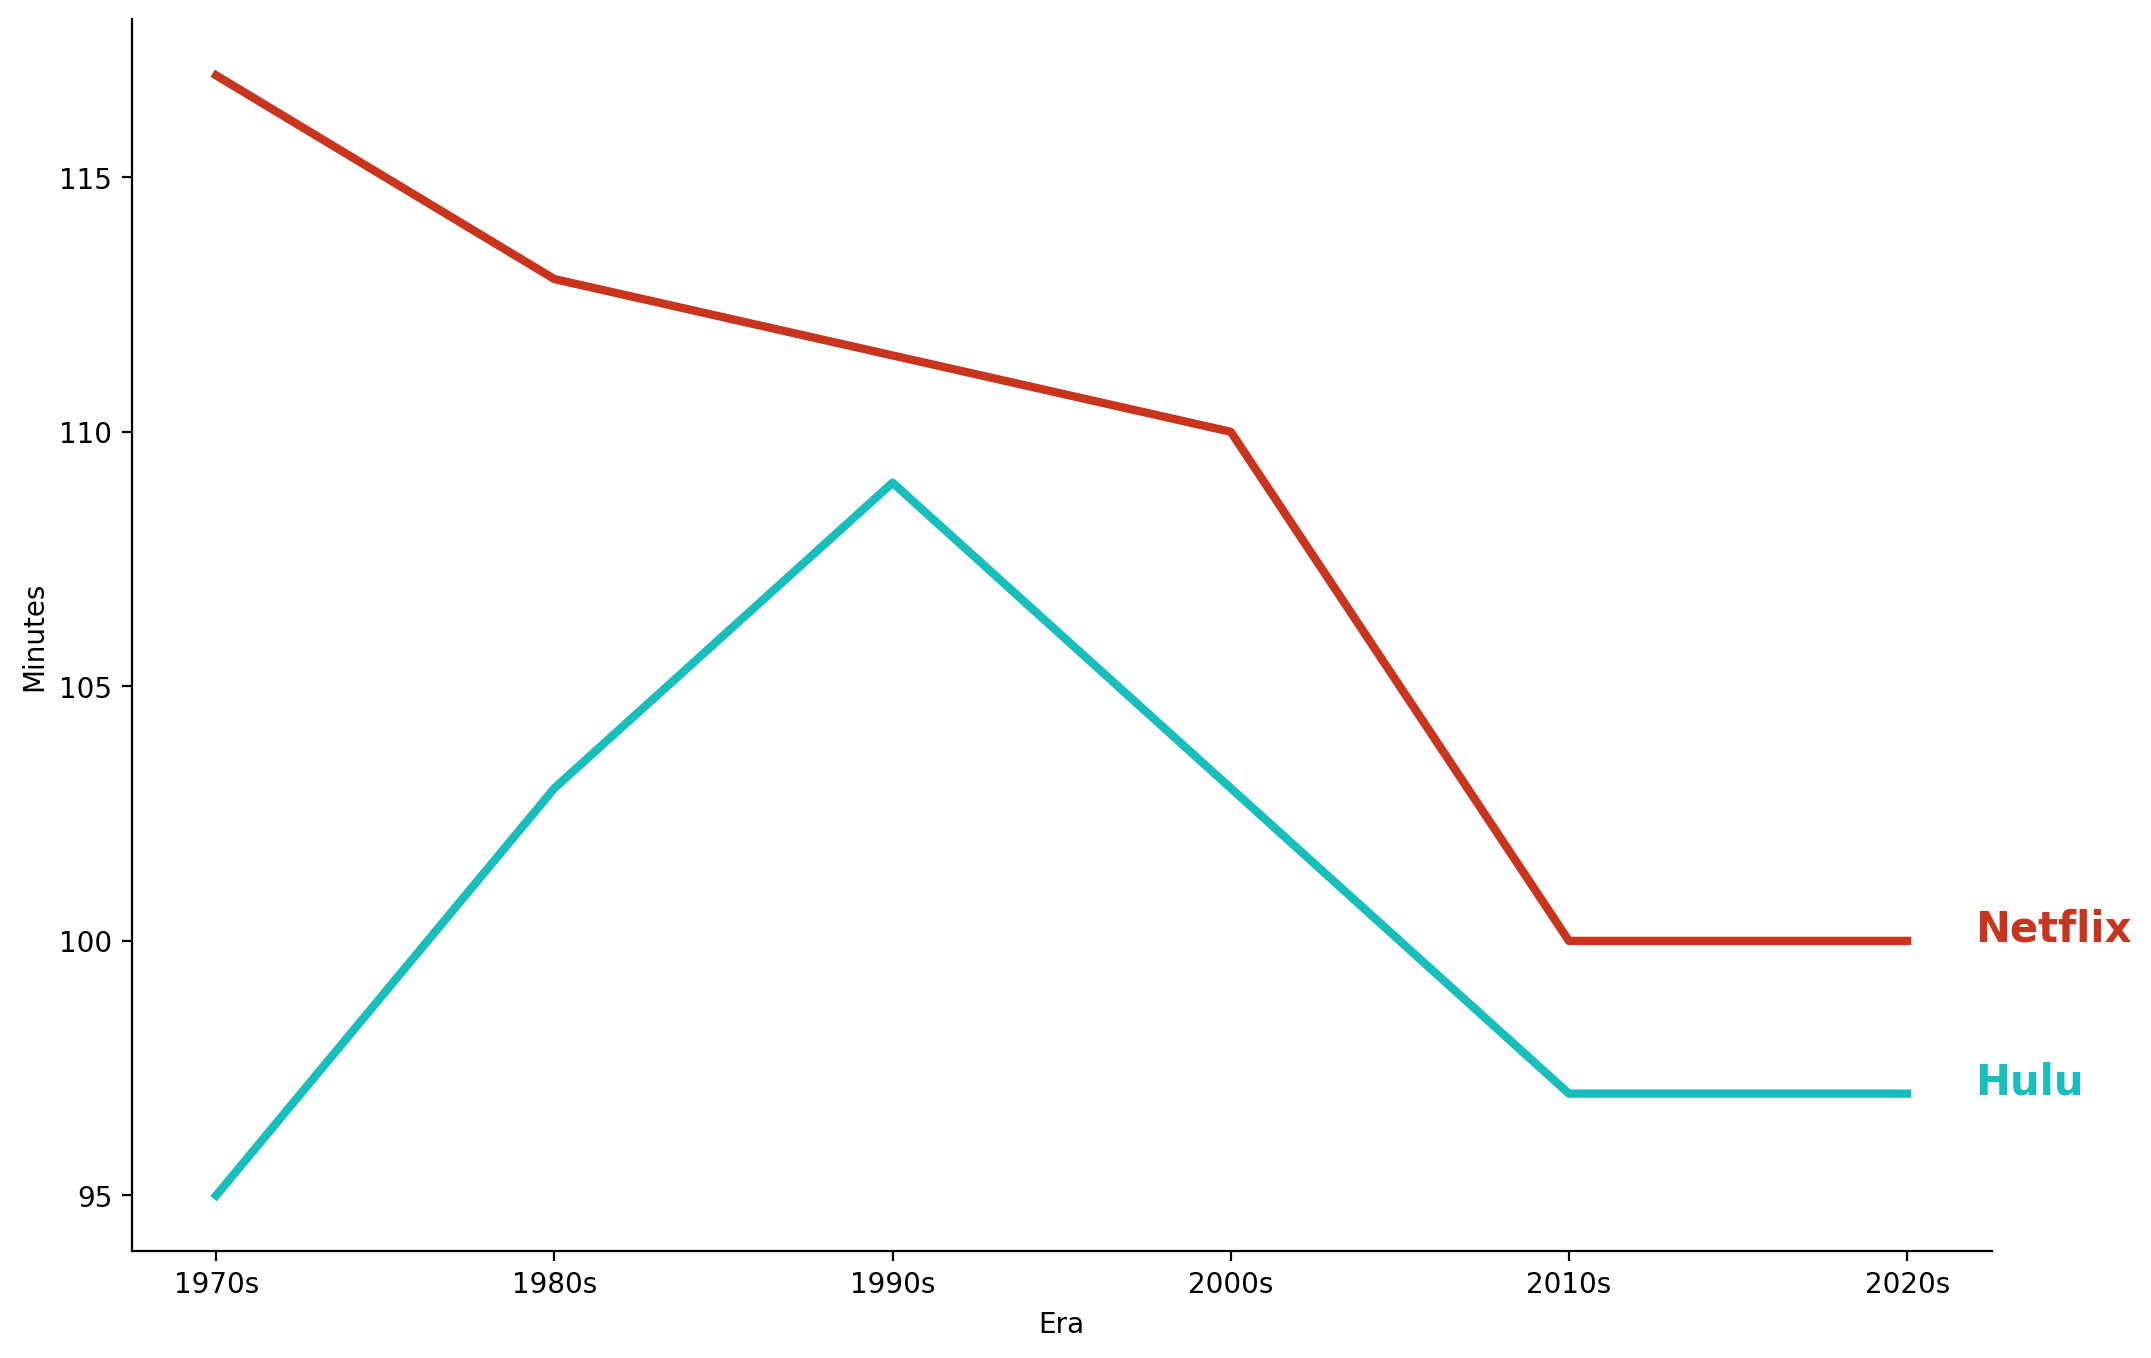

In [53]:
fig, ax = plt.subplots(figsize=(12,8))  

ax.plot(df_hulu_median, label = 'Hulu', color = "#17BEBB", lw = 3)
ax.plot(df_netflix_median, label = 'Netflix', color = "#C8341D", lw =3)


ax.annotate("Netflix", (5.2 , df_netflix_median[-1]  ),size=15,annotation_clip=False, color='#C8341D', weight='bold')
ax.annotate("Hulu", (5.2, df_hulu_median[-1] ),size=15,annotation_clip=False, color='#17BEBB', weight='bold')

#for i, rect in enumerate(range(0,12)):
    #if i == 2: 
        #ax.annotate(f"{df_netflix_median[i]} Min", (i , df_netflix_median[i]+1),size=10,annotation_clip=False, color='orange', weight='bold',bbox=dict(facecolor='white'))
        #ax.annotate(f"{df_hulu_median[i]} Min", (i, df_hulu_median[i]-2),size=10,annotation_clip=False, color='blue', weight='bold',bbox=dict(facecolor='white'))
    #elif i ==4:
        #ax.annotate(f"{df_netflix_median[i]} Min", (i - 0.3 , df_netflix_median[i] + 13),size=10,annotation_clip=False, color='orange', weight='bold',bbox=dict(facecolor='white'))
        #ax.annotate(f"{df_hulu_median[i]} Min", (i - 0.3, df_hulu_median[i] - 13),size=10,annotation_clip=False, color='blue', weight='bold',bbox=dict(facecolor='white', edgecolor = '#d98123'))

plt.xlabel('Era')
plt.ylabel('Minutes')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.set_facecolor('none')
ax.set_facecolor('none')



#ax.set_title("Median Movie Length by Era")


In [33]:
df_movies['year_added'] = df_movies['date_added'].dt.year

pivot_movie_added = pd.pivot_table(df_movies[df_movies['year_added'] >= 2013], values='movie_length', index='year_added', columns='Platform', aggfunc='median')

print(pivot_movie)

Platform   Hulu  Netflix
Era                     
1950s      90.0    106.0
1960s     110.0    152.0
1970s      95.0    117.0
1980s     103.0    113.0
1990s     109.0    111.5
2000s     103.0    110.0
2010s      97.0    100.0
2020s      97.0    100.0


In [34]:
df_hulu_added = df_movies[df_movies['Platform']=='Hulu']
df_netflix_added = df_movies[df_movies['Platform']=='Netflix']

df_hulu_added = df_hulu_added[df_hulu_added['year_added']>= 2014]
df_netflix_added = df_netflix_added[df_netflix_added['year_added']>= 2014]

In [35]:
df_hulu_median_2 = df_hulu_added.groupby('year_added')['movie_length'].median()
df_netflix_median_2 = df_netflix_added.groupby('year_added')['movie_length'].median()

<Axes: xlabel='year_added'>

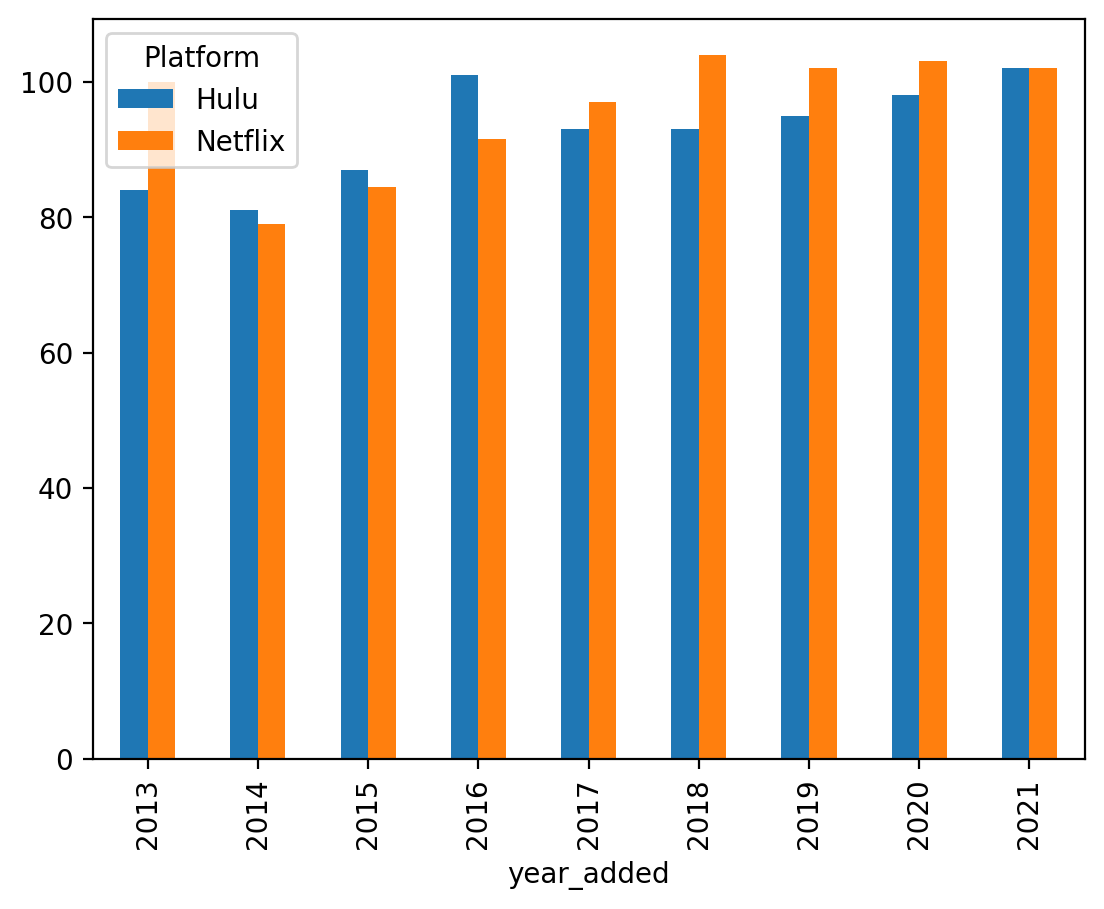

In [36]:
pivot_movie_added.plot(kind = 'bar')

Text(0, 0.5, 'Minutes')

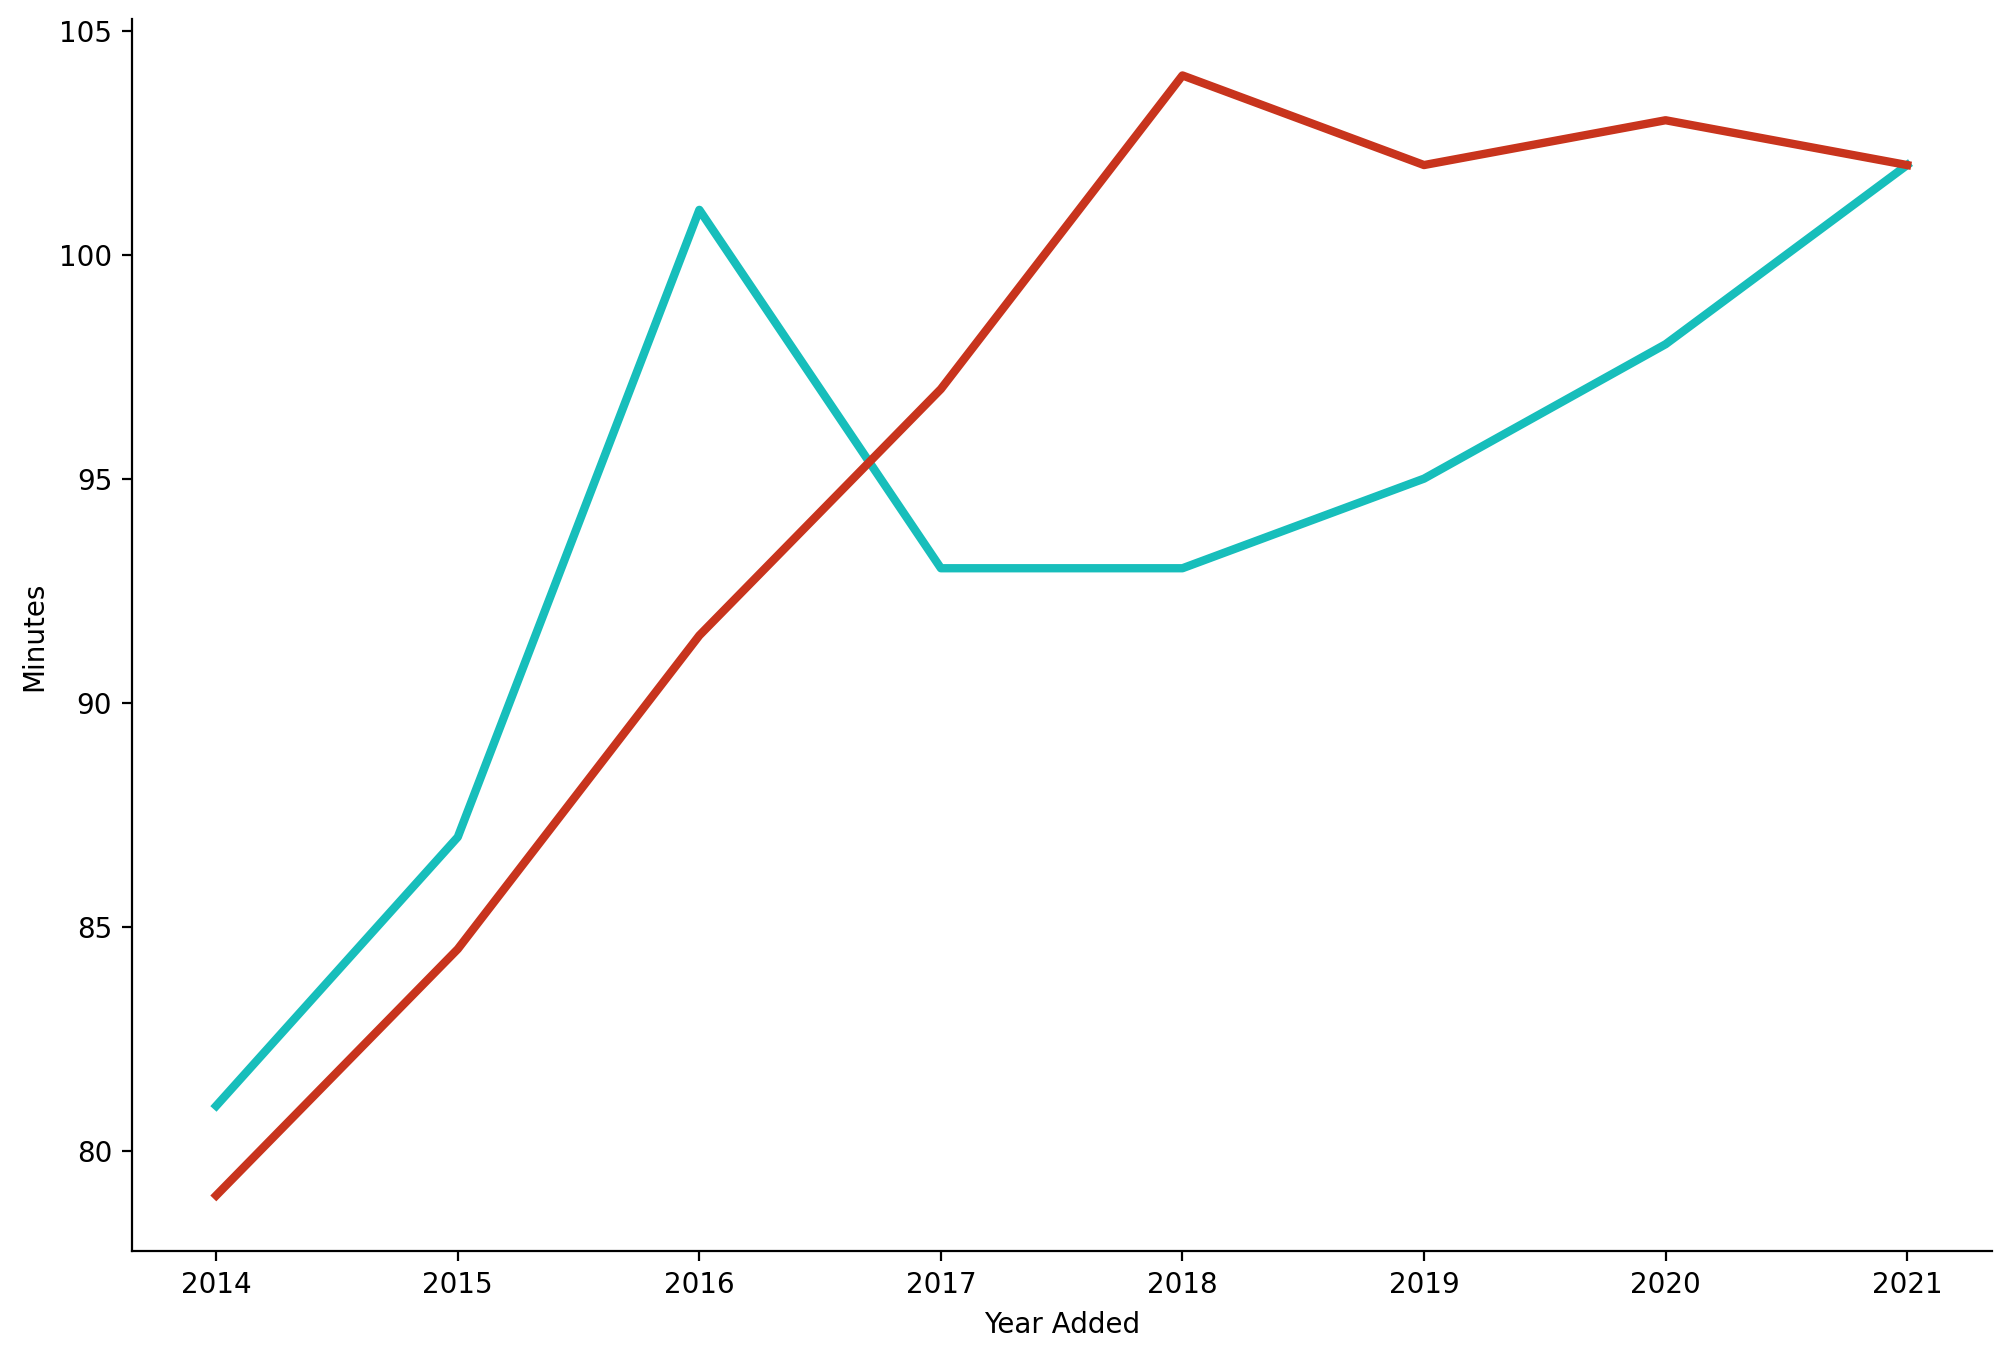

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df_hulu_median_2, label='Hulu', color = '#17BEBB', lw = 3)
ax.plot(df_netflix_median_2, label='Netflix', color = '#C8341D', lw = 3)

#ax.annotate("Netflix", (6 , df_netflix_median_2[-1]  ),size=15,annotation_clip=False, color='#C8341D', weight='bold')
#ax.annotate("Hulu", (6, df_hulu_median_2[-1] ),size=15,annotation_clip=False, color='#17BEBB', weight='bold')

#ax.set_title("Median Movie Length by Year Added")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.legend(loc='lower left', bbox_to_anchor=(1.05, 1))

fig.set_facecolor('none')
ax.set_facecolor('none')

plt.xlabel('Year Added')
plt.ylabel('Minutes')